# Data Dictionary

satisfaction: The overall satisfaction level of the customer. It is a categorical variable with options such as "satisfied" or "neutral or dissatisfied."

Gender: The gender of the customer.

Customer Type: Whether the customer is a "loyal customer" or a "disloyal customer."

Age: The age of the customer.

Type of Travel: The type of travel, such as "Personal Travel" or "Business travel."

Class: The class of travel, such as "Eco" or "Business."

Flight Distance: The distance of the flight.

Seat comfort: Customer rating of seat comfort.

Departure/Arrival time convenient: Customer rating of convenience of departure/arrival times.

Food and drink: Customer rating of food and drink quality.

Gate location: Customer rating of gate location.

Inflight wifi service: Customer rating of inflight Wi-Fi service.

Inflight entertainment: Customer rating of inflight entertainment options.

Online support: Customer rating of online customer support.

Ease of Online booking: Customer rating of ease of online booking.

On-board service: Customer rating of on-board service.

Leg room service: Customer rating of leg room service.

Baggage handling: Customer rating of baggage handling.

Checkin service: Customer rating of check-in service.

Cleanliness: Customer rating of cabin cleanliness.

Online boarding: Customer rating of online boarding process.

Departure Delay in Minutes: The delay in minutes for departure.

Arrival Delay in Minutes: The delay in minutes for arrival.

### Melihat Data
1. Apa permasalahan yang infin diselesaikan?
2. Apa pertanyaan yang ingin dijawab?
3. Buat rencana ttg proses analisa dan proses penemuan insight

### EDA
1. Cari EDA utk mendapatkan insight awal
2. Buat hipotesis dari EDA awal
3. membuat model visualisasi dengan: mencari tren dan pola model visualisasi
4. membandingkan hipotesis awal, cek ketidakcocokan hipotesis awal dan kesimpulan

# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/user/OneDrive/Documents/British Airways/data/British_Airways.csv")
df.head(5)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,NaN,3.0,3,yes,7.0,I virtually gave up on British Airways about...
1,✅ Trip Verified,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,NaN,4.0,4,yes,7.0,I was pleasantly surprised that the airline ...
2,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Miami to Budapest via London,November 2022,2.0,3.0,3.0,4.0,NaN,1.0,1,no,1.0,"British Airways is late, their website is at..."
3,✅ Trip Verified,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),November 2022,3.0,2.0,1.0,NaN,NaN,4.0,2,no,4.0,Flew from Amman to London on Nov. 14 2022. No...
4,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,August 2022,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,This is the worst experience I have ever had ...


# Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1901 non-null   object 
 1   aircraft         1787 non-null   object 
 2   travel_type      2654 non-null   object 
 3   travel_class     3422 non-null   object 
 4   route            2650 non-null   object 
 5   date             2646 non-null   object 
 6   seating_comfort  3326 non-null   float64
 7   staff_service    3319 non-null   float64
 8   food_quality     3094 non-null   float64
 9   entertainment    2413 non-null   float64
 10  wifi             505 non-null    float64
 11  ground_service   2588 non-null   float64
 12  value_for_money  3424 non-null   int64  
 13  recommended      3424 non-null   object 
 14  overall_rating   3418 non-null   float64
 15  review           3424 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 428.1+ KB


In [3]:
print(df.columns)


Index(['status', 'aircraft', 'travel_type', 'travel_class', 'route', 'date',
       'seating_comfort', 'staff_service', 'food_quality', 'entertainment',
       'wifi', 'ground_service', 'value_for_money', 'recommended',
       'overall_rating', 'review'],
      dtype='object')


In [4]:
df.isnull().sum()

status             1523
aircraft           1637
travel_type         770
travel_class          2
route               774
date                778
seating_comfort      98
staff_service       105
food_quality        330
entertainment      1011
wifi               2919
ground_service      836
value_for_money       0
recommended           0
overall_rating        6
review                0
dtype: int64

In [5]:

data= df.drop(['wifi','aircraft','status','ground_service',
              'travel_type','route','date','entertainment'],axis=1)
data.head()


,travel_class,seating_comfort,staff_service,food_quality,value_for_money,recommended,overall_rating,review
0,Business Class,3.0,4.0,4.0,3,yes,7.0,I virtually gave up on British Airways about...
1,Economy Class,4.0,4.0,4.0,4,yes,7.0,I was pleasantly surprised that the airline ...
2,Economy Class,2.0,3.0,3.0,1,no,1.0,"British Airways is late, their website is at..."
3,Premium Economy,3.0,2.0,1.0,2,no,4.0,Flew from Amman to London on Nov. 14 2022. No...
4,Economy Class,1.0,1.0,1.0,1,no,1.0,This is the worst experience I have ever had ...


In [6]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   travel_class     3422 non-null   object 
 1   seating_comfort  3326 non-null   float64
 2   staff_service    3319 non-null   float64
 3   food_quality     3094 non-null   float64
 4   value_for_money  3424 non-null   int64  
 5   recommended      3424 non-null   object 
 6   overall_rating   3418 non-null   float64
 7   review           3424 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 214.1+ KB


travel_class         2
seating_comfort     98
staff_service      105
food_quality       330
value_for_money      0
recommended          0
overall_rating       6
review               0
dtype: int64

# Transform Data

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
SI= SimpleImputer(strategy='most_frequent')

In [9]:
temp = SI.fit_transform(data)

In [10]:
data= pd.DataFrame(temp,columns=data.columns)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   travel_class     3424 non-null   object
 1   seating_comfort  3424 non-null   object
 2   staff_service    3424 non-null   object
 3   food_quality     3424 non-null   object
 4   value_for_money  3424 non-null   object
 5   recommended      3424 non-null   object
 6   overall_rating   3424 non-null   object
 7   review           3424 non-null   object
dtypes: object(8)
memory usage: 214.1+ KB


In [12]:
data['seating_comfort']=data['seating_comfort'].astype('int')
data['staff_service']=data['staff_service'].astype('int')
data['food_quality']=data['food_quality'].astype('int')
data['value_for_money']=data['value_for_money'].astype('int')
data['overall_rating']=data['overall_rating'].astype('int')

In [13]:
data.describe()

,seating_comfort,staff_service,food_quality,value_for_money,overall_rating
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,2.907126,3.334112,2.573014,2.742407,4.847255
std,1.336958,1.489252,1.463525,1.465825,3.159279
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,2.000000
50%,3.000000,4.000000,2.000000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,10.000000


# Data Analyze

In [14]:
data1 = data['recommended'].value_counts()

### Bar graph on ratings

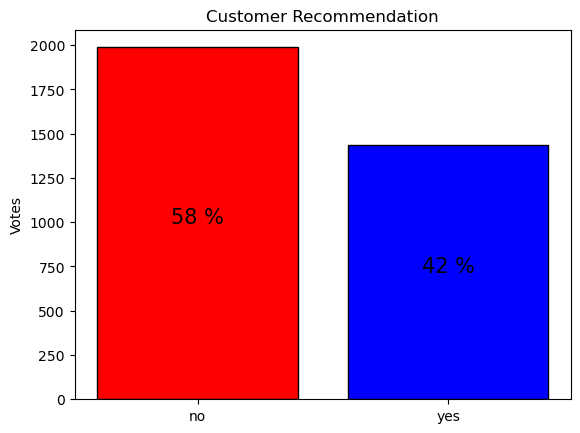

In [15]:
graph1=plt.bar(data1.index,data1.values,color=['Red','Blue'],edgecolor='black')
for bar in graph1:
    height=bar.get_height()
    plt.annotate(f'{round(height*100/3424)} %',(bar.get_x()+bar.get_width()/2,height/2),ha='center',fontsize=15)
plt.title('Customer Recommendation')
plt.ylabel('Votes')
plt.savefig('customer_recommendation.jpg')
plt.show()

### Plot graph: Overall rating

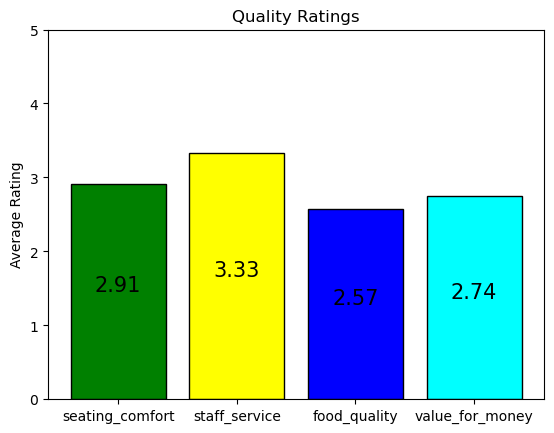

In [16]:
cols=['seating_comfort','staff_service','food_quality','value_for_money']

y=[data[i].mean() for i in cols]
graph2=plt.bar(cols,y,color=['Green','Yellow','Blue','cyan'],edgecolor='black')
for bar in graph2:
    height= bar.get_height()
    plt.annotate(round(height,2),(bar.get_x()+bar.get_width()/2,height/2),ha='center',color='black',fontsize=15)
plt.ylim(0,5)
plt.title('Quality Ratings')
plt.ylabel('Average Rating')
plt.savefig('Quality_Ratings.jpg')
plt.show()

### Pie graph: overall rating /10


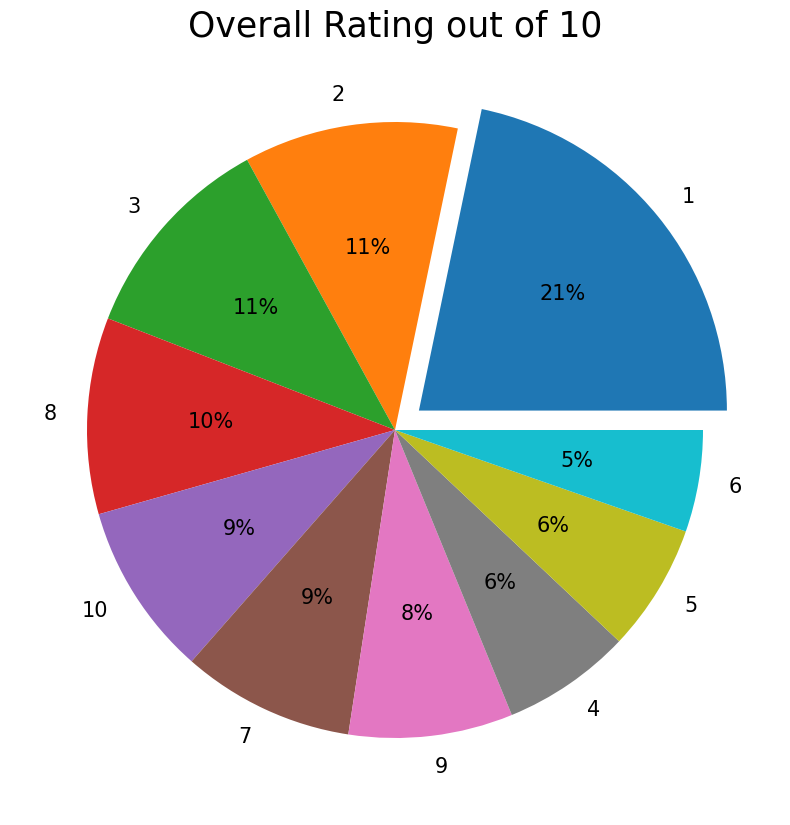

In [17]:
data2=data['overall_rating'].value_counts()
fig=plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.pie(data2.values,labels=data2.index,autopct='%1.1i%%',explode=[0.1,0,0,0,0,0,0,0,0,0],textprops={'fontsize':15})
plt.title('Overall Rating out of 10',fontsize=25)
plt.savefig('Overall_Rating.jpg')
plt.show()

## class-wise analysis

In [18]:
class_wise=data.groupby('travel_class').mean()

In [19]:
class_wise=class_wise.reindex(['Economy Class','Premium Economy','Business Class','First Class']).drop(['overall_rating'],axis='columns')

In [20]:
class_wise

,seating_comfort,staff_service,food_quality,value_for_money
travel_class,,,,
Economy Class,2.777715,3.181353,2.288232,2.658897
Premium Economy,3.047198,3.171091,2.628319,2.746313
Business Class,2.920108,3.511670,2.888689,2.812388
First Class,3.688679,3.929245,3.188679,3.061321


# Sentiment Analysis

In [21]:
reviews= data[['review']]

In [22]:
file1=open("C:/Users/user/OneDrive/Documents/British Airways/data/negative-words.txt",'r',encoding='latin-1')

In [23]:
negative_words=file1.read().split('\n')
file1.close()

In [24]:
file2=open("C:/Users/user/OneDrive/Documents/British Airways/data/positive-words.txt",'r',encoding='latin-1')

In [25]:
positive_words=file2.read().split('\n')
file2.close()

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [27]:
stop_words = stopwords.words('english')
lemma = WordNetLemmatizer()


In [28]:
import re
def preprocess(text):
    corpus=re.sub('[^a-zA-Z0-9 \n\.]', ' ', text)
    tokens=word_tokenize(corpus)
    tokens=[i for i in tokens if i not in stop_words]
    tokens=[lemma.lemmatize(i).lower() for i in tokens]
    return tokens

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
reviews['filtered']=reviews['review'].apply(preprocess)

C:\Users\user\AppData\Local\Temp\ipykernel_1164\1378374444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['filtered']=reviews['review'].apply(preprocess)


In [31]:
def sentiment(corpus):
    pos=len([i for i in corpus if i in positive_words])
    neg=len([i for i in corpus if i in negative_words])
    return pos/(neg+1)

In [32]:
reviews['sentiment_score']=reviews['filtered'].apply(sentiment)

C:\Users\user\AppData\Local\Temp\ipykernel_1164\2304488572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment_score']=reviews['filtered'].apply(sentiment)


In [33]:
reviews.sample(5)

,review,filtered,sentiment_score
2380,British Airways from London to Bahrain and ret...,"[british, airways, london, bahrain, return, .,...",0.833333
2227,Recently flew to LA on British Airways and was...,"[recently, flew, la, british, airways, thoroug...",0.333333
1929,British Airways Lounge in T3 was very busy as...,"[british, airways, lounge, t3, busy, shared, a...",3.500000
84,As a regular BA customer on European flights...,"[as, regular, ba, customer, european, flight, ...",0.600000
2386,Flew British Airways from Fuerteventura to Gat...,"[flew, british, airways, fuerteventura, gatwic...",3.000000


In [34]:
reviews.review.iloc[1294]

"  Malta to Gatwick. This is for British Airways Catering Service Managers. They have invested a lot of time and money into your meal scheme so as to earn extra income rather than give free meals. Initially I was very impressed when I spied the M&S food and drink menu which does merit appreciation. However, on flight BA 2645 from Malta to Gatwick my initial feelings of happiness were swiftly gutted. I am a strict vegetarian so I was happy to see the selection of vegetarian fayre but unfortunately by the time the trolley got to me (a long time I might add) there was no veggie sandwiches, no veggie focaccia, not even mixed nuts (for heavens sake!). Of course there was plenty for the non-vegetarians. Not only that but the Couscous Salad has chicken on it but no veggie alternative. I was very disappointed and BA need to do better. For me to fly with BA again I'd need some assurances that they will care just as much for the veggie people as for the meatheads. "

In [35]:
reviews.sentiment_score.iloc[1294]

2.0

In [36]:
def sentiment(score):
    if score<=1.1 and score>=0.9:
        return 'Neutral'
    if score>1.1:
        return 'Positive'
    return 'Negative'

In [37]:
reviews['sentiment']=reviews['sentiment_score'].apply(sentiment)

C:\Users\user\AppData\Local\Temp\ipykernel_1164\101543761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment']=reviews['sentiment_score'].apply(sentiment)


In [38]:
data['sentiment']=reviews['sentiment']

In [39]:
counts=reviews.sentiment.value_counts()

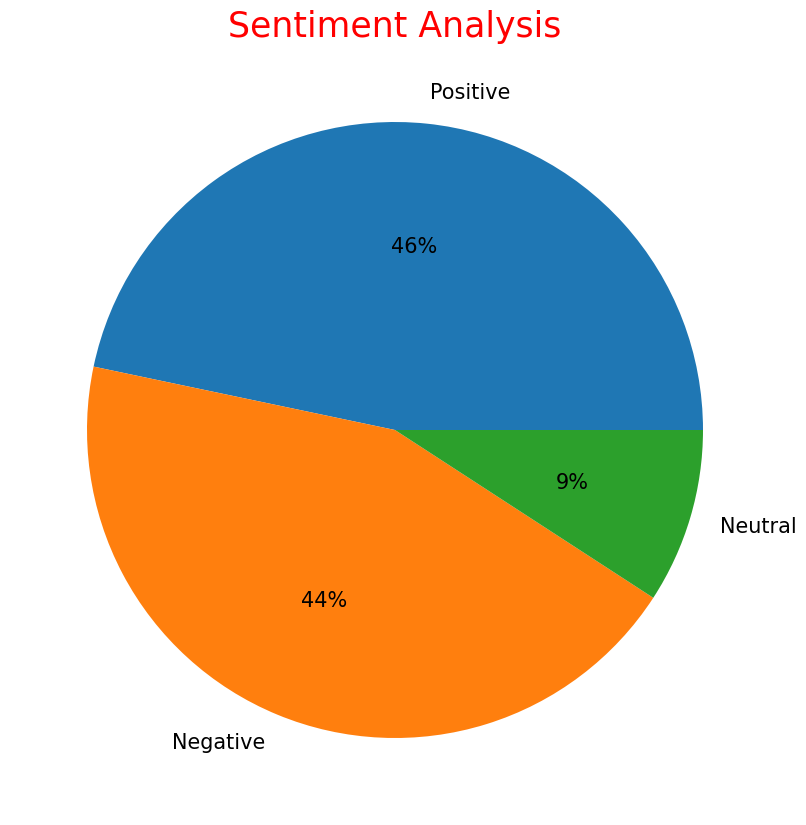

In [40]:
fig=plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.pie(counts.values,labels=counts.index,autopct='%1.1i%%',textprops={'fontsize':15})
plt.title('Sentiment Analysis',fontsize=25,color='red')
plt.savefig('Sentiment_Analysis.jpg')
plt.show()